# Salary Prediction Linear Regression

In [20]:
#Import Libraries

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split 
from sklearn.preprocessing import StandardScaler , MinMaxScaler
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score , mean_squared_error

In [21]:
#Load Dataset

salaries_data = pd.read_csv('Datasets/ds_level1.csv')
salaries_data

,Unnamed: 0,Year,Company,City,State,Title,Salary Level,Area,Total Annual Compensation,Years of Experience,Years at Company,Base Salary,Stock Grant Value,Bonus,Masters Degree,Bachelors Degree,Doctorate Degree,Highschool,Some College
0,0,2021,Accenture,Indianapolis,IN,Data Scientist,1,Data,16000,0,0.0,13000,0,3000,0,1,0,0,0
1,1,2021,Bank of America,Charlotte,NC,Data Scientist,1,data science,15000,1,1.0,15000,0,3000,0,0,0,0,0
2,2,2020,PayPal,Chennai,TN,Data Scientist,1,Data,30000,4,2.0,22000,8000,0,0,0,0,0,0
3,3,2021,Verizon,Chennai,TN,Data Scientist,1,Analytics,35000,8,1.0,32000,1000,3000,1,0,0,0,0
4,4,2021,Accenture,Dublin,NH,Data Scientist,1,General,34000,0,0.0,34000,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
117,117,2021,IBM,Austin,TX,Data Scientist,1,General,115000,2,2.0,98000,0,17000,0,1,0,0,0
118,118,2021,Northrop Grumman,Baltimore,MD,Data Scientist,1,General,98000,5,5.0,98000,0,0,0,0,0,0,0
119,119,2021,Walmart,Dallas,TX,Data Scientist,1,General,139000,1,1.0,98000,25000,16000,1,0,0,0,0
120,120,2019,Deloitte,Washington,DC,Data Scientist,1,Distributed Systems (Back-End),104000,4,1.0,99000,0,5000,0,0,0,0,0


In [22]:
#Check for null values
salaries_data.isnull().sum()

Unnamed: 0                   0
Year                         0
Company                      0
City                         0
State                        0
Title                        0
Salary Level                 0
Area                         0
Total Annual Compensation    0
Years of Experience          0
Years at Company             0
Base Salary                  0
Stock Grant Value            0
Bonus                        0
Masters Degree               0
Bachelors Degree             0
Doctorate Degree             0
Highschool                   0
Some College                 0
dtype: int64

In [23]:
salaries_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 122 entries, 0 to 121
Data columns (total 19 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Unnamed: 0                 122 non-null    int64  
 1   Year                       122 non-null    int64  
 2   Company                    122 non-null    object 
 3   City                       122 non-null    object 
 4   State                      122 non-null    object 
 5   Title                      122 non-null    object 
 6   Salary Level               122 non-null    int64  
 7   Area                       122 non-null    object 
 8   Total Annual Compensation  122 non-null    int64  
 9   Years of Experience        122 non-null    int64  
 10  Years at Company           122 non-null    float64
 11  Base Salary                122 non-null    int64  
 12  Stock Grant Value          122 non-null    int64  
 13  Bonus                      122 non-null    int64  

In [24]:
salaries_data.describe()

,Unnamed: 0,Year,Salary Level,Total Annual Compensation,Years of Experience,Years at Company,Base Salary,Stock Grant Value,Bonus,Masters Degree,Bachelors Degree,Doctorate Degree,Highschool,Some College
count,122.000000,122.000000,122.0,122.000000,122.000000,122.000000,122.000000,122.000000,122.000000,122.000000,122.000000,122.000000,122.0,122.0
mean,60.500000,2020.344262,1.0,90344.262295,2.663934,1.446721,81500.000000,2762.295082,6049.180328,0.327869,0.262295,0.008197,0.0,0.0
std,35.362409,0.724660,0.0,23706.110553,2.686393,1.363344,18351.143365,7210.017456,6168.237032,0.471373,0.441696,0.090536,0.0,0.0
min,0.000000,2018.000000,1.0,15000.000000,0.000000,0.000000,13000.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.0
25%,30.250000,2020.000000,1.0,80000.000000,1.000000,0.000000,77250.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.0
50%,60.500000,2020.000000,1.0,95000.000000,2.000000,1.000000,85500.000000,0.000000,5000.000000,0.000000,0.000000,0.000000,0.0,0.0
75%,90.750000,2021.000000,1.0,103750.000000,3.000000,2.000000,95000.000000,0.000000,10000.000000,1.000000,1.000000,0.000000,0.0,0.0
max,121.000000,2021.000000,1.0,152000.000000,17.000000,6.000000,99000.000000,54000.000000,25000.000000,1.000000,1.000000,1.000000,0.0,0.0


In [25]:
ds = pd.read_csv("Datasets/ds_level1.csv", usecols = ['Years of Experience', 'Total Annual Compensation'])
ds

,Total Annual Compensation,Years of Experience
0,16000,0
1,15000,1
2,30000,4
3,35000,8
4,34000,0
...,...,...
117,115000,2
118,98000,5
119,139000,1
120,104000,4


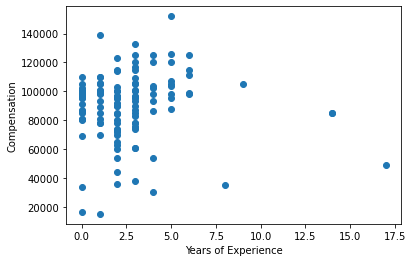

In [26]:
plt.scatter( ds['Years of Experience'] ,ds['Total Annual Compensation'] )
plt.xlabel('Years of Experience')
plt.ylabel('Compensation')
plt.show()

In [27]:
X = ds.drop('Total Annual Compensation',axis=1)
y = ds['Total Annual Compensation']

In [28]:
X.shape , y.shape

((122, 1), (122,))

In [29]:
X_train , X_test , Y_train , Y_test = train_test_split(X,y,random_state=1764,test_size=0.5)
X_train.shape , X_test.shape , Y_train.shape , Y_test.shape

((61, 1), (61, 1), (61,), (61,))

In [30]:
lr = LinearRegression()
lr.fit(X_train, Y_train)

LinearRegression()

In [31]:
pred = lr.predict(X_test)
pred

array([ 85884.62273161, 138022.9226361 ,  93332.9512894 , 138022.9226361 ,
       149195.41547278,  93332.9512894 , 104505.44412607,  97057.11556829,
       108229.60840497, 108229.60840497,  85884.62273161,  93332.9512894 ,
        89608.78701051,  85884.62273161,  93332.9512894 ,  93332.9512894 ,
        97057.11556829,  89608.78701051, 104505.44412607,  97057.11556829,
        85884.62273161,  97057.11556829, 100781.27984718,  93332.9512894 ,
        93332.9512894 ,  97057.11556829, 100781.27984718, 119402.10124164,
       104505.44412607,  89608.78701051,  97057.11556829,  89608.78701051,
        93332.9512894 , 104505.44412607,  85884.62273161,  89608.78701051,
       100781.27984718,  89608.78701051,  97057.11556829,  97057.11556829,
        85884.62273161,  93332.9512894 ,  85884.62273161, 108229.60840497,
       115677.93696275,  97057.11556829,  97057.11556829,  89608.78701051,
        89608.78701051,  97057.11556829,  93332.9512894 ,  93332.9512894 ,
        93332.9512894 ,  

In [32]:
Y_test

80    102000
50     85000
30     84000
53     85000
9      49000
       ...  
27     75000
90    105000
75    101000
60     85000
5      36000
Name: Total Annual Compensation, Length: 61, dtype: int64

In [33]:
diff = Y_test - pred

In [34]:
pd.DataFrame(np.c_[Y_test , pred , diff] , columns=['Actual','Predicted','Difference'])

,Actual,Predicted,Difference
0,102000.0,85884.622732,16115.377268
1,85000.0,138022.922636,-53022.922636
2,84000.0,93332.951289,-9332.951289
3,85000.0,138022.922636,-53022.922636
4,49000.0,149195.415473,-100195.415473
...,...,...,...
56,75000.0,97057.115568,-22057.115568
57,105000.0,85884.622732,19115.377268
58,101000.0,89608.787011,11391.212989
59,85000.0,97057.115568,-12057.115568


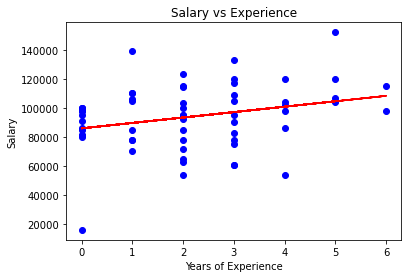

In [35]:
plt.scatter(X_train , Y_train , color='blue')
plt.plot(X_train ,lr.predict(X_train),color='red')
plt.title('Salary vs Experience')
plt.xlabel('Years of Experience')
plt.ylabel("Salary")
plt.show()

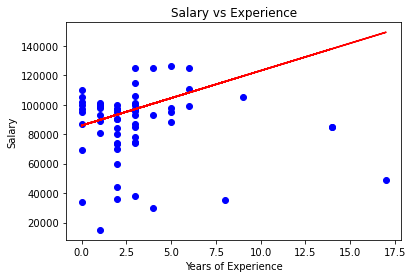

In [36]:
plt.scatter(X_test , Y_test,color='blue')
plt.plot(X_test ,lr.predict(X_test) ,color='red')
plt.title('Salary vs Experience')
plt.xlabel('Years of Experience')
plt.ylabel("Salary")
plt.show()

In [37]:
lr.score(X_test , Y_test)

-0.5252772689804006